# Labwork on recoginition of digits by a Neural Network

## Introduction

The purpose of this exercise is to give an example of the use of neural networks. We'll use neural networks to create a system capable of recognizing handwritten digits. The general functionality of said system consists of the following:
- An input (in this case, our handwritten digits)
- The hidden layers, which will work towards the recognition of a given digit
- The output, which will be a digit between 0 and 9


In this labwork, we will use 3 tools.
* **Keras** :
To build our neural networks.
* **Numpy** :
To manage vector and matrix easily.
* **Matplotlib** :
To plot images and graphs in order to illustrate our results.

## Preliminaries


### Importation of libraries

Our first step, as in all Python code, is to import the necessary libraries for the exercise. We'll use TensorFlow 1.14 for it to be compatible with our current version of Keras, which supports all of the methods we need. We'll also import varios Keras components, like models, layer, and optimizers.

Finally, we'll include the library that's never missing in model creation: numpy. Numpy includes various mathematical methods required for ML and NN development.

In [2]:
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
import keras.metrics as metrics
import numpy as np

### Loading of data

Secondly, we'll do our next essential step: the inclusion of data. As we had already learned in the course before, the MINST dataset was compiled throughout the years by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges, and provides us with thousands of samples of handwritten digits, which can be used to train and test our models. 

The inclusion of this dataset is very simple, as we're only required to import "mnist" from Keras' datasets module. 

Here's also an important detail: we're going to be using different datasets to train and to test our model. The cause of this has already been explained in our course, but just to review, we're doing this to stop our model from overfitting the training dataset. If we used a single dataset to both train and test, we'd end up with a model that has a very low error rate for said set, but a much higher one for others.

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

Here, we simply use matplotlib for visual representation. In this case, we're using it to display a digit from our dataset, which is represented as a 28 x 28 matrix.

6


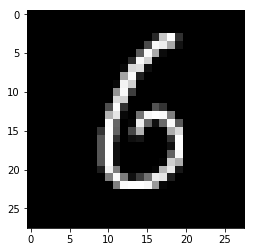

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[18], cmap="Greys_r")
print(y_train[18])

For the following step, we have to notice something: the data that we're using for images is, naturally, represented by a matrix. Said matrix has a total of 784 pixels, and each pixel is represented by a number from 0 to 1. However, this number is not a probability, as it usually is in other ML/NN exercices. 

This time around, this number from 0 to 1 represents the color of the current pixel. 0 means that the pixel is completely black (hexadecimal code #000000), while 1 represents a white pixel (#FFFFFF).

Now that we know this, we have to remember that we can't use matrices as inputs for a neural network. At least, not in their "actual" matrix state. Instead of using a whole 28x28 matrix as an input, we'll convert this into an array of 748 elements, which will have the range of values we already talked about above. 

As we can see below, we're doing this for both the training and the test datasets.

In [5]:
range_ = range(10)
x_train_d = x_train.reshape((x_train.shape[0], -1))
x_test_d = x_test.reshape((x_test.shape[0], -1))
y_train_d = np.array( [ [ 0 if i!=r else 1 for i in range_ ] for r in y_train ])
y_test_d = np.array( [ [ 0 if i!=r else 1 for i in range_ ] for r in y_test ])

n_input = x_train_d.shape[1] #784

### Plotting

Now, we're going to do a little bit of plotting. This does not affect the functionality of our neural network in general, but it will help us evaluate the results more easily, by giving us a visual representation of them.

In this case, we're using a bar chart to represent the probability of a given handwritten digit belonging to one class or the other.

In [6]:
def show_prediction(data, img) :
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    tick_label = ['{}'.format(i) for i in range(10)]
    plt.bar(tick_label, data)
    plt.subplot(122)
    plt.imshow(img, cmap="Greys_r")


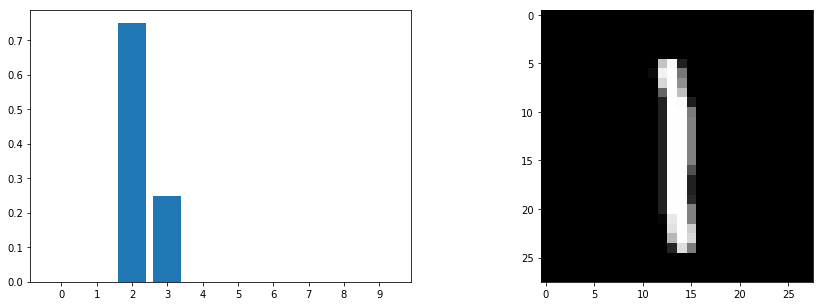

In [7]:
show_prediction(np.array([0, 0, 0.75, 0.25, 0, 0, 0, 0, 0, 0]), x_train[14])

## Neural network



### Creation of the model

Here comes the most interesting part. We have our datasets, we have our input, and we have our plotting. Now, it's time to create our model. We'll explain more in depth all of our models components in our practical report. 

For now, let's remark how easy it is to build a model with Keras: it all consists in a pretty simple process in which we add all of our layers and set up some parameters like dropout or the activation function(s) we're giong to use. 

Our first architecture is made of a sequence of
* **a Full connected layer with input size = 784 and output size =  400, ending with relu activation**
* **a batch normalization layer**
* **a Dropout layer**


* **a Full connected layer with input size = 400 and output size = 64, ending with relu activation**
* **a batch normalization**
* **a Dropout layer**


* **a Full connected layer with input size = 64 and output size = 10, ending with softmax activation**

So we have a full connected neural network with this architecture : **784 -> 400 -> 64 -> 10**  
The activation function used in the hidden layers is **ReLU**,  
$ ReLU(z) = max(0,z)$  
And the activation function of the output layer is **softmax**  
$ softmax(z_i) = \frac{ e^{z_i}}{ \sum_j{ e^{z_j} } }$

We add in this architecture dropout layers with probability of **0.2**. These layers will help our Network to avoid overfitting effects by cancelling, with a probability of 0.2, some neuron effect during a turn of training.

The normalization is layer is used to contract output between -1 and 1, in order to make sure that the variance of parameters is not high. The reason for that is that, if parameters are too divergent, it will create an overfitting effect.


In [20]:
model = models.Sequential()
dropout = 0.2

n_layer_1 = 400
n_layer_2 = 64

lr = 0.02

model.add(layers.Dense(n_layer_1, input_dim=n_input, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(dropout))
model.add(layers.Dense(n_layer_2, input_dim=n_layer_1, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(dropout))
model.add(layers.Dense(10, input_dim=n_layer_2, activation="softmax"))

optimizer = optimizers.SGD(lr=lr)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

The optimization method we use for this method is SGD, and the learning rate chosen is 0.02. And then, we have chosen as loss function, the cross entropy loss.

#### Training of the model

As the subtitle implies, it's time to train our model. For this, we'll choose the number of epochs we'd like to run (40, in our case), the size of our data batches, and our validation split (0.15, then the validation data is taken from the training data, and it is 15% of the original training data). 
And to finish, our training data will be split into batch of 32.
These parameters are preliminary and we'll play around with them in the following examples, to compare the results we get with different parameteres.

In [21]:
model.fit(x_train_d, y_train_d, epochs=40, batch_size=32, validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/40
51000/51000 [==============================] - 14s 266us/step - loss: 0.3825 - accuracy: 0.8852 - val_loss: 0.1557 - val_accuracy: 0.9594
Epoch 2/40
51000/51000 [==============================] - 14s 265us/step - loss: 0.2096 - accuracy: 0.9366 - val_loss: 0.1307 - val_accuracy: 0.9692
Epoch 3/40
51000/51000 [==============================] - 14s 276us/step - loss: 0.1657 - accuracy: 0.9503 - val_loss: 0.1250 - val_accuracy: 0.9696
Epoch 4/40
51000/51000 [==============================] - 14s 267us/step - loss: 0.1435 - accuracy: 0.9561 - val_loss: 0.1134 - val_accuracy: 0.9737
Epoch 5/40
51000/51000 [==============================] - 13s 255us/step - loss: 0.1292 - accuracy: 0.9603 - val_loss: 0.1090 - val_accuracy: 0.9746
Epoch 6/40
51000/51000 [==============================] - 13s 262us/step - loss: 0.1174 - accuracy: 0.9629 - val_loss: 0.1084 - val_accuracy: 0.9758
Epoch 7/40
51000/51000 [==============================] -

#### Explaination of the learning procedure

The learning is done in **40 turns (the number of epochs)**, during which the model will ameliorate its parameters (weights and bias) by a **schochastic gradient descent optimization**.

Before the learning, the original training data is split into 2 batchs, the learning data batch and the validation data batch. **The validation data batch is 20% of the original learning data**.
And then, during the learning, the new learning data batch is split into **batches of size 32**, in order to facilitate the learning and make it faster. The loss is computed for each batch, by a **cross entropy loss function**, after a mean error is computed.

Having the final error, a backpropagation algorithm is executed and at the end all the parameters are upgraded by a **SGD optimizer**.

#### Evaluation of the model

Last, but not least, we're going to see how good our model is. This process is very simply and, in Keras, can be done with a single line of code. We just have to call the evaluate() method and select the test data we'll be using for the evaluation. 

In [22]:
model.evaluate(x_test_d, y_test_d)

10000/10000 [==============================] - 1s 102us/step


[0.10896185940111172, 0.9814000129699707]

After training, our model obtains **a success rate of 98.14%**. It does not seem terrible, but when compared to the state-of-the art for MNIST, it could be much better. Later on this document, we'll play our hyperparameters and try new architectures.

#### Visualization 

Again, to demonstrate how our model works, we'll use a digit from our dataset and see what is predicted for it.

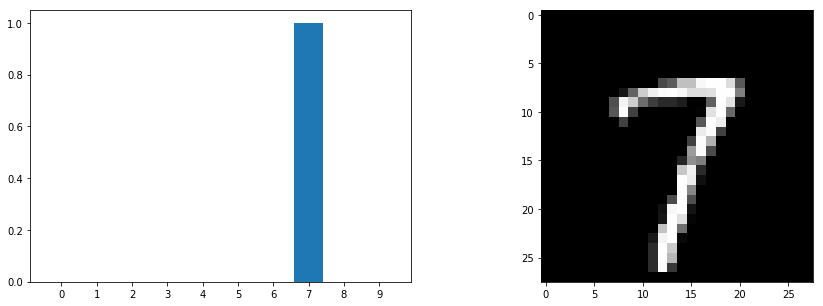

In [27]:
n = 2262
show_prediction(result[n], x_test[n] )

### Model 4 : Let's try with convolutional neural network !


Knowing that a full connected neural network is limited, now we will try to recognize digits by using a convolutional neural network. The architecture of our network is the following :

* A convolutional layer with 32 filters and a kernel of size 3x3, using ReLU
* A batch normalization layer
* A convolutional layer with 32 filters and a kernel of size 3x3, using ReLU
* A batch normalization layer
* A Convolutional layer with 32 filters and a kernel of size 5x5, using ReLU
* A batch normalization layer
* A dropout layer
* A Convolutional layer with 64 filters and a kernel of size 3x3, using ReLU
* A batch normalization layer
* A Convolutional layer with 64 filters and a kernel of size 3x3, using ReLU
* A batch normalization layer
* A Convolutional layer with 64 filters and a kernel of size 5x5, using ReLU
* A batch normalization layer
* A dropout layer
* A Convolutional layer with 128 filters and a kernel of size 3x3, using ReLU
* A batch normalization layer
* A dropout layer
* A full connected layer of output size = 10, using softmax activation

Our **learning rate is 0.02**, optimized by **SGD procedure**, and our **loss function is the cross entropy**.   
ReLU proved recently it's a good choice, so we choose **ReLU** as activation function in the hidden layers.  
And the activation function of the output layer is **softmax**.  

Because of the high number of neurons, we will increase the **dropout probability to 0.4** 


In [91]:
model3 = models.Sequential()
dropout3 = 0.4

model3.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model3.add(layers.BatchNormalization())

model3.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model3.add(layers.BatchNormalization())

model3.add(layers.Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model3.add(layers.BatchNormalization())

model3.add(layers.Dropout(dropout3))

model3.add(layers.Conv2D(64, kernel_size = 3, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(64, kernel_size = 3, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(dropout3))

model3.add(layers.Conv2D(128, kernel_size = 4, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Flatten())
model3.add(layers.Dropout(dropout3))
model3.add(layers.Dense(10, activation='softmax'))


optimizer3 = optimizers.SGD(lr=0.02)
model3.compile(loss="categorical_crossentropy", optimizer=optimizer3, metrics=["accuracy"])

Let's train this model. We will run the training with only **20 epochs**, because this model is very complex, and I love my computer.

In [92]:
x_train_conv = x_train.reshape((-1, 28, 28, 1))

In [93]:
model3.fit(x_train_conv, y_train_d, epochs=20, batch_size=32, validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 [==============================] - 238s 5ms/step - loss: 0.2068 - accuracy: 0.9359 - val_loss: 0.0474 - val_accuracy: 0.9853
Epoch 2/20
51000/51000 [==============================] - 226s 4ms/step - loss: 0.0780 - accuracy: 0.9764 - val_loss: 0.0339 - val_accuracy: 0.9901
Epoch 3/20
51000/51000 [==============================] - 221s 4ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0298 - val_accuracy: 0.9921
Epoch 4/20
51000/51000 [==============================] - 221s 4ms/step - loss: 0.0505 - accuracy: 0.9845 - val_loss: 0.0276 - val_accuracy: 0.9929
Epoch 5/20
51000/51000 [==============================] - 219s 4ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0381 - val_accuracy: 0.9889
Epoch 6/20
51000/51000 [==============================] - 209s 4ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0262 - val_accuracy: 0.9931
Epoch 7/20
51000/51000 [==============================] - 215s 

#### Evaluation

Just like before, we will evaluate our model.

In [94]:
x_test_conv = x_test.reshape((-1, 28,28, 1))

In [95]:
model3.evaluate(x_test_conv, y_test_d)

10000/10000 [==============================] - 12s 1ms/step


[0.015301902328125288, 0.9957000017166138]

Great ! We obtain **an accuracy of 99.57%** on the test data batch. It means that convolutional architecture is really better than the previous architecture.